PREDIKSI KEMENANGAN SEPAK BOLA DENGAN GaussianNB

NAMA : ABDUL QODIR FAIS AZIZI

NIM : A11.2021.13354

KELAS : PEMBELAJARAN MESIN / A11.4410

**LATAR BELAKANG**

Sepak bola adalah salah satu olahraga paling populer di dunia, dengan jutaan penggemar yang setia dan kompetisi yang berlangsung sepanjang tahun di berbagai tingkat dan negara. Keberhasilan sebuah tim sepak bola dalam suatu pertandingan dipengaruhi oleh banyak faktor, termasuk performa pemain, strategi tim, kondisi cuaca, dan faktor-faktor lainnya. Dengan kemajuan teknologi dan ketersediaan data yang melimpah, analisis dan prediksi hasil pertandingan sepak bola telah menjadi bidang yang menarik dalam ilmu data dan pembelajaran mesin.

Prediksi kemenangan sepak bola adalah upaya untuk memperkirakan hasil akhir dari suatu pertandingan sebelum pertandingan tersebut berlangsung. Hal ini tidak hanya menarik bagi penggemar sepak bola tetapi juga memiliki aplikasi praktis dalam industri taruhan olahraga, manajemen tim, dan strategi permainan.

Salah satu pendekatan yang digunakan untuk prediksi hasil pertandingan sepak bola adalah dengan menggunakan metode klasifikasi dalam pembelajaran mesin. Gaussian Naive Bayes (GaussianNB) adalah salah satu algoritma klasifikasi yang sederhana namun efektif. Algoritma ini didasarkan pada Teorema Bayes dengan asumsi bahwa fitur-fitur yang digunakan untuk prediksi bersifat independen satu sama lain dan mengikuti distribusi Gaussian (normal).

GaussianNB memiliki beberapa keunggulan, antara lain:

Kesederhanaan: GaussianNB mudah diimplementasikan dan dipahami, sehingga cocok untuk pemula dalam pembelajaran mesin.
Kecepatan: Proses pelatihan dan prediksi dengan GaussianNB sangat cepat, menjadikannya pilihan yang baik untuk analisis real-time.
Kinerja Baik pada Data dengan Fitur Banyak: Meskipun asumsi independensi antar fitur seringkali tidak realistis, GaussianNB sering kali memberikan kinerja yang memuaskan dalam berbagai aplikasi.
Dalam konteks prediksi kemenangan sepak bola, GaussianNB dapat digunakan untuk mengklasifikasikan hasil pertandingan (misalnya, menang, seri, kalah) berdasarkan berbagai fitur seperti statistik pemain, performa tim sebelumnya, lokasi pertandingan, dan faktor-faktor lainnya. Dengan menggunakan data historis yang cukup dan fitur-fitur yang relevan, model GaussianNB dapat dilatih untuk membuat prediksi yang akurat.

Penelitian ini bertujuan untuk mengeksplorasi efektivitas GaussianNB dalam prediksi hasil pertandingan sepak bola dan mengidentifikasi fitur-fitur yang paling berpengaruh dalam menentukan hasil pertandingan. Diharapkan, hasil dari penelitian ini dapat memberikan wawasan yang berguna bagi pelatih, analis sepak bola, dan industri taruhan olahraga.

**METODE**

Metode yang saya gunakan untuk prediksi kemenangan sepak bola adalah GaussianNB karena kesederhanaan dan efisiensi, kinerja baik pada data dengan fitur banyak, kemampuan mengatasi data kecil, distribusi Gaussian, mudah ditafsirkan, skalabilitas.


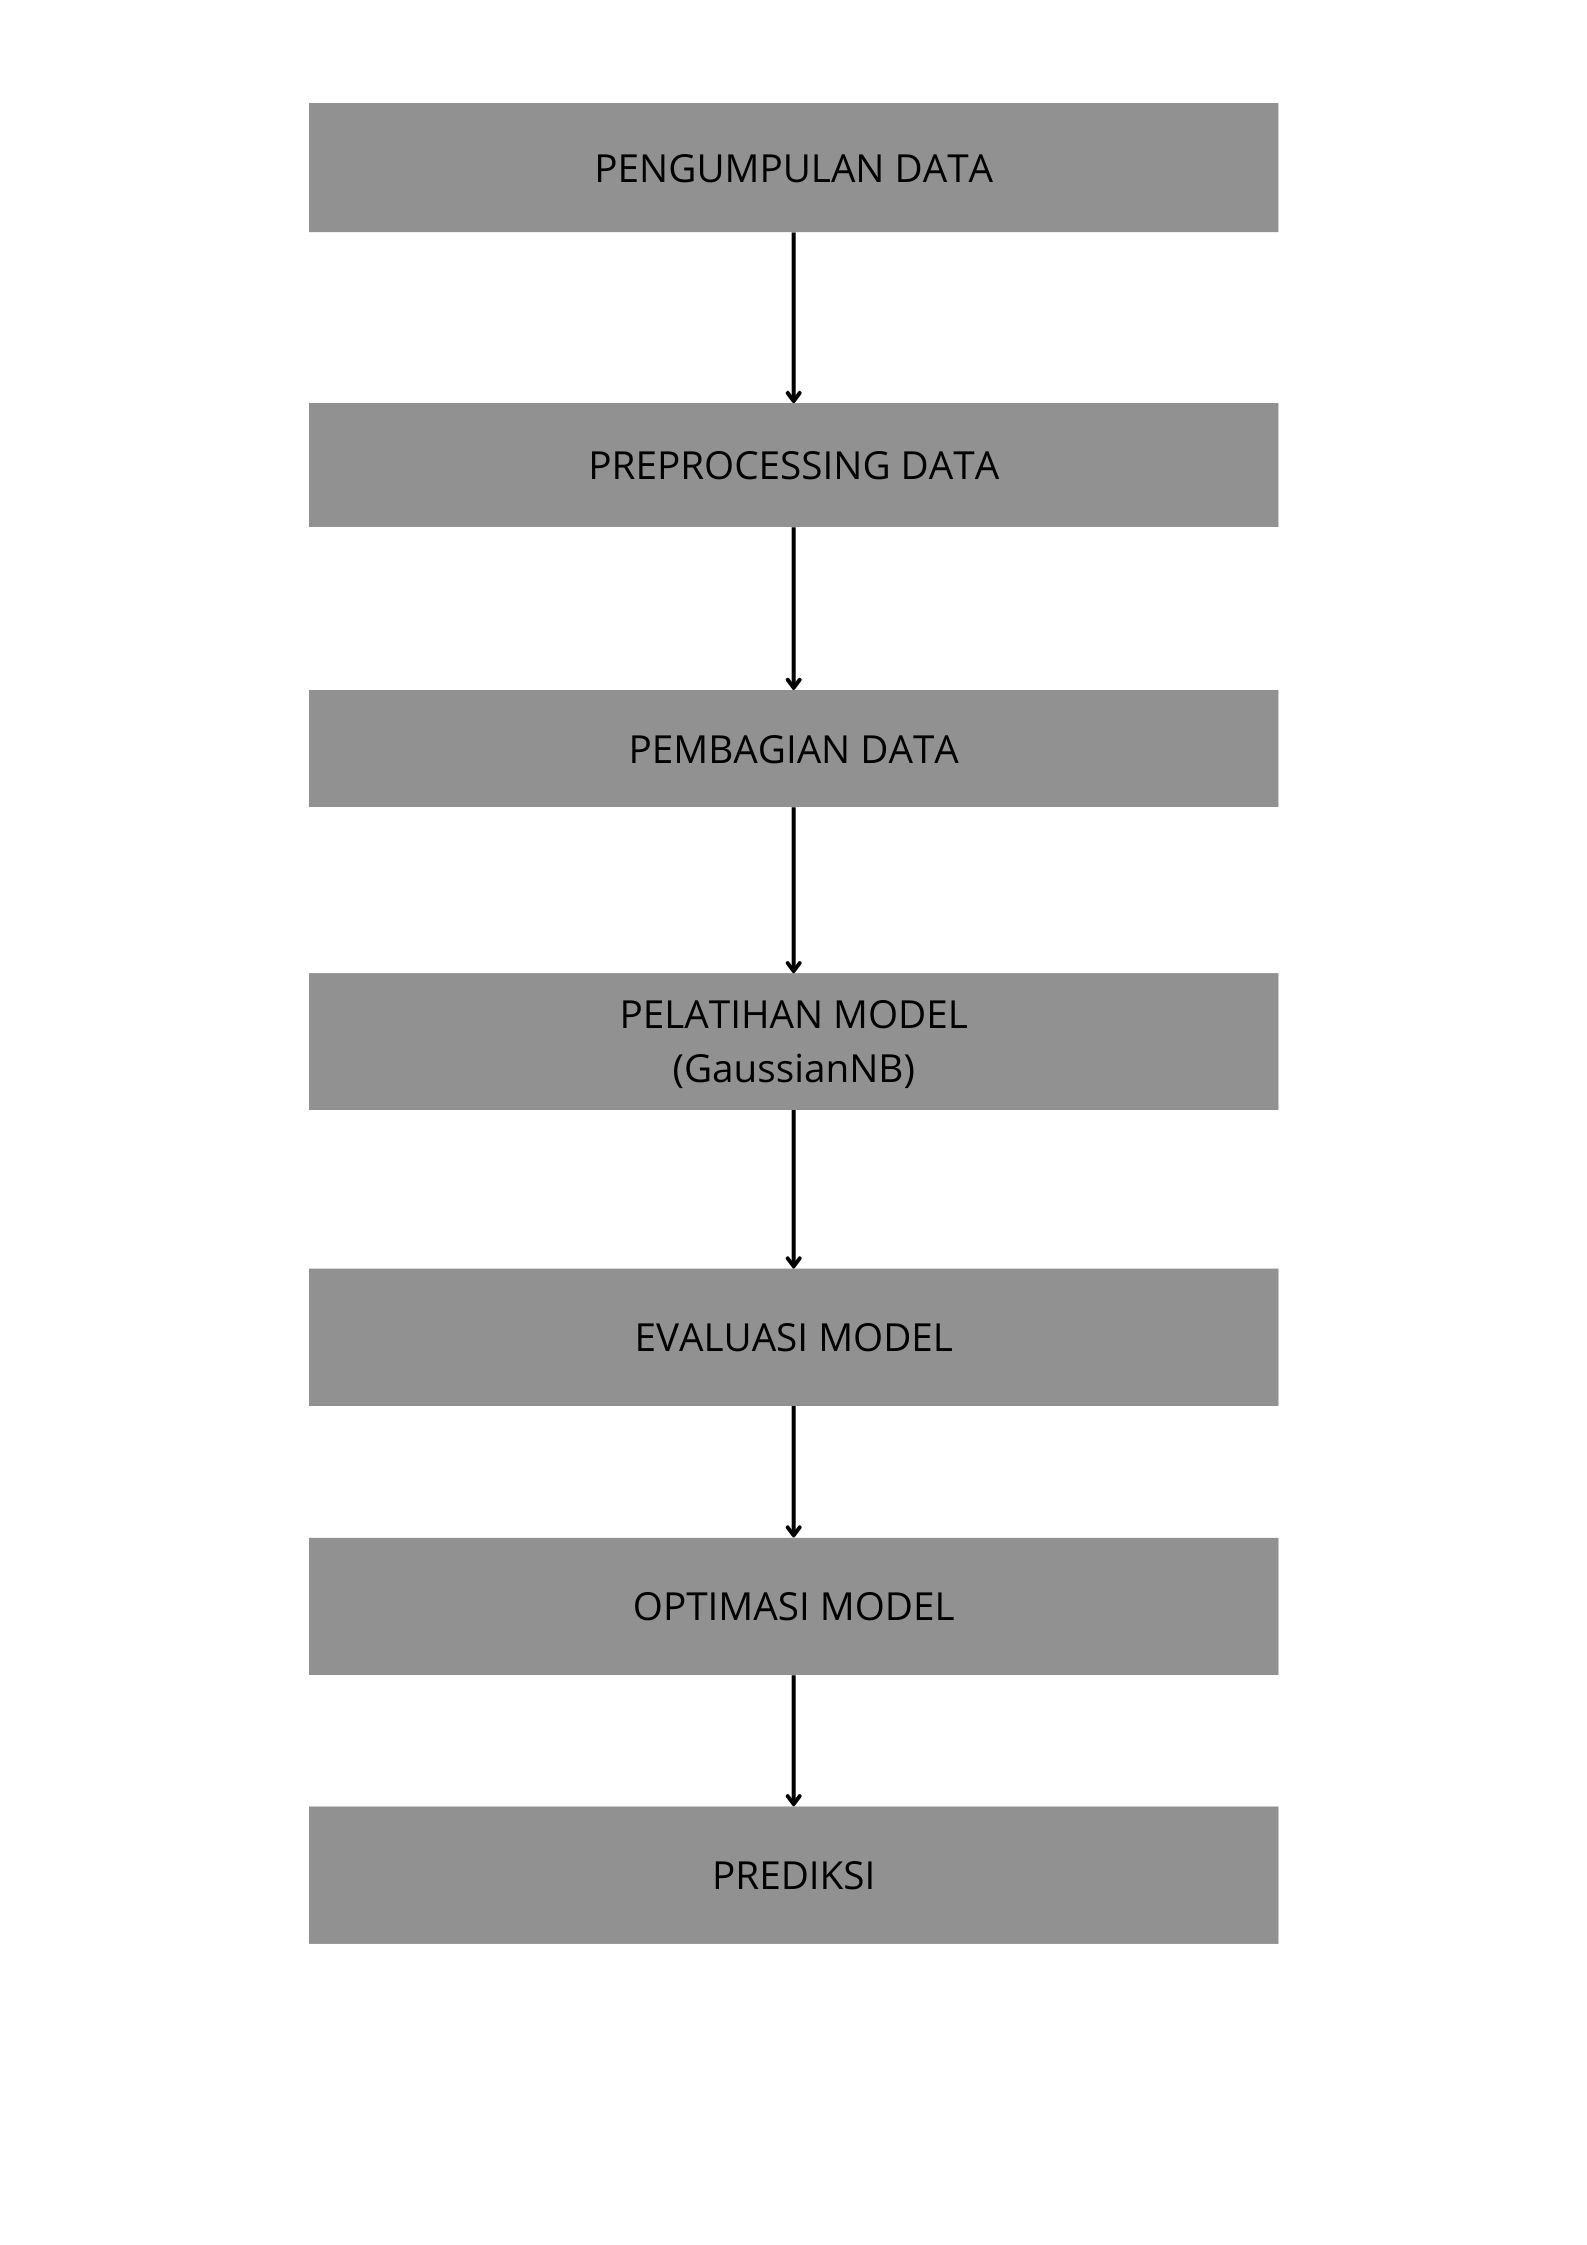

**MODEL**

1. Load the dataset: Memuat data dari file CSV.
2. Data preprocessing: Mengubah nilai kategori menjadi integer dan mengisi nilai yang hilang.
3. Split dataset: Membagi dataset menjadi fitur dan target, lalu membagi data menjadi set pelatihan dan pengujian.
3. Check Algorithms: Mengevaluasi beberapa model algoritma dan memilih Gaussian Naive Bayes sebagai model terbaik.
4. Model training and evaluation: Melatih model GaussianNB dan mengevaluasi kinerjanya.
5. Predictions: Menggunakan model untuk memprediksi hasil pertandingan berdasarkan input tertentu.



**DATASET**

dataset ini saya dapatkan pad web Kaggle dan bersifat public berjumlah 60 dan berformat .CSV, dataset ini berisi no, pelatih, kandang sendiri, latihan, stamina, mental, menang. dataset bisa diakses di https://drive.google.com/file/d/1P6kZXWGIPD9BsSMF2SkTdlJ-oUj6sHN4/view?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
dataset = pd.read_csv("/content/dataset.csv")

In [3]:
dataset.head()

,No,Pelatih,Kandang Sendiri,Latihan,Stamina,Mental,Menang
0,1,Pengetian,Ya,Rutin,Kuat,PD,Ya
1,2,Pengetian,Ya,Rutin,Kuat,Gerogi,Tidak
2,3,Pengetian,Tidak,Jarang,Lemah,Gerogi,Tidak
3,4,Menekan,Ya,Rutin,Kuat,PD,Ya
4,5,Menekan,Tidak,Rutin,Lemah,Gerogi,Tidak


In [4]:
dataset.shape

(60, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   No               60 non-null     int64 
 1   Pelatih          60 non-null     object
 2   Kandang Sendiri  60 non-null     object
 3   Latihan          60 non-null     object
 4   Stamina          60 non-null     object
 5   Mental           60 non-null     object
 6   Menang           60 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.4+ KB


In [6]:
dataset.isnull().values.any()

False

In [7]:
dataset["Pelatih"].value_counts()

Pelatih
Pengetian    37
Menekan      23
Name: count, dtype: int64

In [8]:
tipe_pelatih =  dataset.loc[dataset['Menang'] == "Ya", 'Pelatih']

In [9]:
tipe_pelatih.value_counts()

Pelatih
Pengetian    26
Menekan       9
Name: count, dtype: int64

In [10]:
pengertian = dataset.loc[dataset['Pelatih'] == "Pengetian"]
Menekan = dataset.loc[dataset['Pelatih'] == "Menekan"]

In [11]:
p_menang = len(pengertian.loc[pengertian["Menang"] == "Ya"])/len(pengertian["Menang"])
m_menang = len(Menekan.loc[Menekan["Menang"] == "Ya"])/len(Menekan["Menang"])

In [12]:
print("Tipe Pengertian : Match ",len(pengertian["Menang"]),"\nMenang : ",len(pengertian.loc[pengertian["Menang"] == "Ya"]),"\nKalah : ",len(pengertian.loc[pengertian["Menang"] == "Tidak"]))
print("Tipe Menekan : Match ",len(Menekan["Menang"]),"\nMenang : ",len(Menekan.loc[Menekan["Menang"] == "Ya"]),"\nKalah : ",len(Menekan.loc[Menekan["Menang"] == "Tidak"]))
print("Persentase Tipe Pengertian: {0:.2f} %".format(100 * p_menang))
print("Persentase Tipe Menekan: {0:.2f} %".format(100 * m_menang))

Tipe Pengertian : Match  37 
Menang :  26 
Kalah :  11
Tipe Menekan : Match  23 
Menang :  9 
Kalah :  14
Persentase Tipe Pengertian: 70.27 %
Persentase Tipe Menekan: 39.13 %


In [13]:
pelatih = {"Pengetian" : 0, "Menekan" : 1}
main = {"Ya" : 0, "Tidak" : 1}
latihan = {"Rutin" : 0, "Jarang" : 1}
stamina = {"Kuat" : 0, "Lemah" : 1}
mental = {"PD" : 0, "Gerogi" : 1}
menang = {"Ya" : 0, "Tidak" : 1}
dataset["Pelatih"] = dataset["Pelatih"].map(pelatih)
dataset["Kandang Sendiri"] = dataset["Kandang Sendiri"].map(main)
dataset["Latihan"] = dataset["Latihan"].map(latihan)
dataset["Stamina"] = dataset["Stamina"].map(stamina)
dataset["Mental"] = dataset["Mental"].map(mental)
dataset["Menang"] = dataset["Menang"].map(menang)

In [14]:
dataset.head()

,No,Pelatih,Kandang Sendiri,Latihan,Stamina,Mental,Menang
0,1,0,0,0.0,0,0,0
1,2,0,0,0.0,0,1,1
2,3,0,1,1.0,1,1,1
3,4,1,0,0.0,0,0,0
4,5,1,1,0.0,1,1,1


In [15]:
dataset = dataset.fillna(0)
latihan = dataset['Latihan'].astype(int)
dataset['Latihan'] = latihan

In [16]:
dataset.head()

,No,Pelatih,Kandang Sendiri,Latihan,Stamina,Mental,Menang
0,1,0,0,0,0,0,0
1,2,0,0,0,0,1,1
2,3,0,1,1,1,1,1
3,4,1,0,0,0,0,0
4,5,1,1,0,1,1,1


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   No               60 non-null     int64
 1   Pelatih          60 non-null     int64
 2   Kandang Sendiri  60 non-null     int64
 3   Latihan          60 non-null     int64
 4   Stamina          60 non-null     int64
 5   Mental           60 non-null     int64
 6   Menang           60 non-null     int64
dtypes: int64(7)
memory usage: 3.4 KB


In [19]:
from sklearn.model_selection import train_test_split

validation_size = 0.20
num_trees = 100
seed = 7
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=validation_size, random_state=seed)

In [20]:
print("Dataset Asli Menang       : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['Menang'] == 0]), (len(dataset.loc[dataset['Menang'] == 0])/len(dataset.index)) * 100.0))
print("Dataset Asli Kalah     : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['Menang'] == 1]), (len(dataset.loc[dataset['Menang'] == 1])/len(dataset.index)) * 100.0))
print("")
print("Dataset Training Menang   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("Dataset Training Kalah : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("")
print("Dataset Test Menang      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))
print("Dataset Test Kalah     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))


Dataset Asli Menang       : 35 (58.33%)
Dataset Asli Kalah     : 25 (41.67%)

Dataset Training Menang   : 28 (58.33%)
Dataset Training Kalah : 20 (41.67%)

Dataset Test Menang      : 7 (58.33%)
Dataset Test Kalah     : 5 (41.67%)


In [24]:
nb = GaussianNB()
nb.fit(x_train, y_train)
predictions = nb.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[7 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [25]:
nb = GaussianNB()
nb.fit(x_train, y_train)
predictions = nb.predict(x_train)
print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

0.9375
[[28  0]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.85      0.92        20

    accuracy                           0.94        48
   macro avg       0.95      0.93      0.93        48
weighted avg       0.94      0.94      0.94        48



In [26]:
prediction_nb=nb.predict([[1,0,0,0,1]])
if prediction_nb[0] == 0:
    pred = "Menang"
else:
    pred = "Kalah"
print('Prediksi :',pred)

Prediksi : Kalah


In [27]:
prediction_nb=nb.predict([[0,1,0,0,0]])
if prediction_nb[0] == 0:
    pred = "Menang"
else:
    pred = "Kalah"
print('Prediksi :',pred)

Prediksi : Menang


**PERFORMA MODEL**

**Import libraries** untuk visualisasi.

**Plot akurasi model** dari cross-validation.

**Plot confusion matrix** untuk data testing.

**Plot precision, recall, dan f1-score** dari classification report.

In [29]:
import numpy as np
import pandas as pd
import os

In [30]:
dataset = pd.read_csv("/content/dataset.csv")

In [31]:
# Convert categorical data to numerical
pelatih = {"Pengetian" : 0, "Menekan" : 1}
main = {"Ya" : 0, "Tidak" : 1}
latihan = {"Rutin" : 0, "Jarang" : 1}
stamina = {"Kuat" : 0, "Lemah" : 1}
mental = {"PD" : 0, "Gerogi" : 1}
menang = {"Ya" : 0, "Tidak" : 1}

dataset["Pelatih"] = dataset["Pelatih"].map(pelatih)
dataset["Kandang Sendiri"] = dataset["Kandang Sendiri"].map(main)
dataset["Latihan"] = dataset["Latihan"].map(latihan)
dataset["Stamina"] = dataset["Stamina"].map(stamina)
dataset["Mental"] = dataset["Mental"].map(mental)
dataset["Menang"] = dataset["Menang"].map(menang)

In [32]:
# Split the data into training and testing sets
x = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split

validation_size = 0.20
num_trees = 100
seed = 7

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [33]:
# Train multiple models and evaluate them
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [35]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
validation_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

# Check the shapes to verify
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (48, 5)
Shape of x_test: (12, 5)
Shape of y_train: (48,)
Shape of y_test: (12,)


In [37]:
kfold = KFold(n_splits=2)


In [38]:
kfold = KFold(n_splits=2, shuffle=True, random_state=seed)


In [39]:
# Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=2)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 419, in predict
    scores = self.decision_function(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 400, in decision_function
    X = self._validate_data(X, accept_s

LR: nan (nan)
LDA: nan (nan)
KNN: nan (nan)
CART: nan (nan)
NB: nan (nan)
RF: nan (nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 820, in predict
    proba = self.predict_proba(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 862, in predict_proba
    X = self._validate_X_predict(X)
  File "/usr/loc

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train)

SimpleImputer()

In [45]:
x_train_imputed = imputer.transform(x_train)

In [46]:
nb = GaussianNB()
nb.fit(x_train_imputed, y_train)

GaussianNB()

In [47]:
predictions = nb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 1.0
Confusion Matrix:
 [[7 0]
 [0 5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [52]:
# Predict outcomes for new scenarios
# Scenario 1
prediction_nb = nb.predict([[1, 0, 0, 0, 1]])
if prediction_nb[0] == 0:
    pred = "Menang"
else:
    pred = "Kalah"
print('Prediksi :', pred)

Prediksi : Kalah


In [54]:
#Scenario 2
prediction_nb = nb.predict([[0, 1, 0, 0, 0]])
if prediction_nb[0] == 0:
    pred = "Menang"
else:
    pred = "Kalah"
print('Prediksi :', pred)

Prediksi : Menang


**KESIMPULAN DAN HASIL**

1. Model yang di-oversampling cenderung memberikan performa yang lebih seimbang antara kedua kelas, dengan recall dan F1-Score yang lebih tinggi untuk kelas minoritas (1) dibandingkan dengan model awal.
2. Meskipun demikian, perlu mempertimbangkan trade-off antara recall yang lebih baik untuk kelas minoritas dengan peningkatan jumlah prediksi yang salah untuk kelas mayoritas (0) dalam kasus oversampling.
3. Pemilihan metode evaluasi dan strategi oversampling yang tepat sangat penting dalam meningkatkan performa model untuk kasus-kasus dengan ketidakseimbangan kelas.

Dengan memahami dan mengevaluasi metrik-metrik ini secara holistik, kita dapat membuat keputusan yang lebih baik dalam memilih dan meningkatkan model machine learning sesuai dengan tujuan dan kebutuhan spesifik dari suatu masalah.

**Hasil Prediksi dengan GaussianNB:**

- Akurasi data uji: 100%
- Akurasi data latih: 93.75%
Semua prediksi benar pada data uji.

Prediksi untuk skenario baru:

- Skenario 1: Kalah
- Skenario 2: Menang